<a href="https://colab.research.google.com/github/spireon-ex10/Handwritten-digit-recognition-KERAS/blob/master/99_28_accuracy_with_17%2C710_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


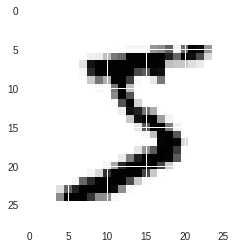

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D
model = Sequential()                        #from keras.models import Sequential


#from keras.layers import Dense, Activation
#apply a 3x3 convolution with 32 output filters(channel which filter out) on a 28x28 image:
#filter == kernel == feature extractor
#
#relu : Rectifier Linear Unit
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(30, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  


In [0]:
# model.add(MaxPooling2D(2,2))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8670      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 10)          310       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=70, verbose=1)#, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/70
60000/60000 [==============================] - 8s 134us/step - loss: 0.5542 - acc: 0.8230
Epoch 2/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.1155 - acc: 0.9643
Epoch 3/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0831 - acc: 0.9744
Epoch 4/70
60000/60000 [==============================] - 4s 59us/step - loss: 0.0678 - acc: 0.9794
Epoch 5/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0595 - acc: 0.9817
Epoch 6/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0492 - acc: 0.9849
Epoch 7/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0454 - acc: 0.9860
Epoch 8/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0407 - acc: 0.9876
Epoch 9/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0358 - acc: 0.9891
Epoch 10/70
60000/60000 [==============================] - 3s 58us/step - loss: 0.0337 - acc: 0.989

In [0]:
# model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)#, validation_data=(X_val, Y_val))

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04185688439489136, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.70061662e-29 3.32745979e-23 4.38289144e-19 1.49894960e-18
  4.26400790e-32 2.02659905e-24 0.00000000e+00 1.00000000e+00
  2.04097829e-21 1.17165943e-14]
 [4.86823346e-19 3.27405829e-17 1.00000000e+00 1.11223703e-29
  1.67021716e-32 0.00000000e+00 1.08541543e-22 3.43881250e-38
  2.78828497e-19 7.91702692e-37]
 [1.38419856e-18 1.00000000e+00 1.63019945e-12 8.24537473e-17
  5.15088146e-11 9.92735692e-14 1.73484577e-15 1.80645943e-09
  3.51906546e-12 2.12274948e-15]
 [1.00000000e+00 8.61533548e-33 1.07133445e-22 5.90524351e-30
  3.15776701e-28 4.01130409e-26 1.37685485e-14 4.34479602e-30
  8.93018056e-25 2.18867912e-23]
 [4.26608201e-36 1.57251716e-17 9.87059804e-26 1.07268778e-30
  1.00000000e+00 2.77597693e-32 7.01203163e-31 5.53377566e-27
  2.95705520e-23 5.69268550e-14]
 [2.94373385e-20 1.00000000e+00 9.49841910e-15 1.84495462e-20
  1.29651864e-13 8.70926168e-22 1.67209060e-18 1.26623362e-13
  9.33391480e-14 4.16810917e-17]
 [0.00000000e+00 1.75055684e-20 2.53364894e-23 6.62674201e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

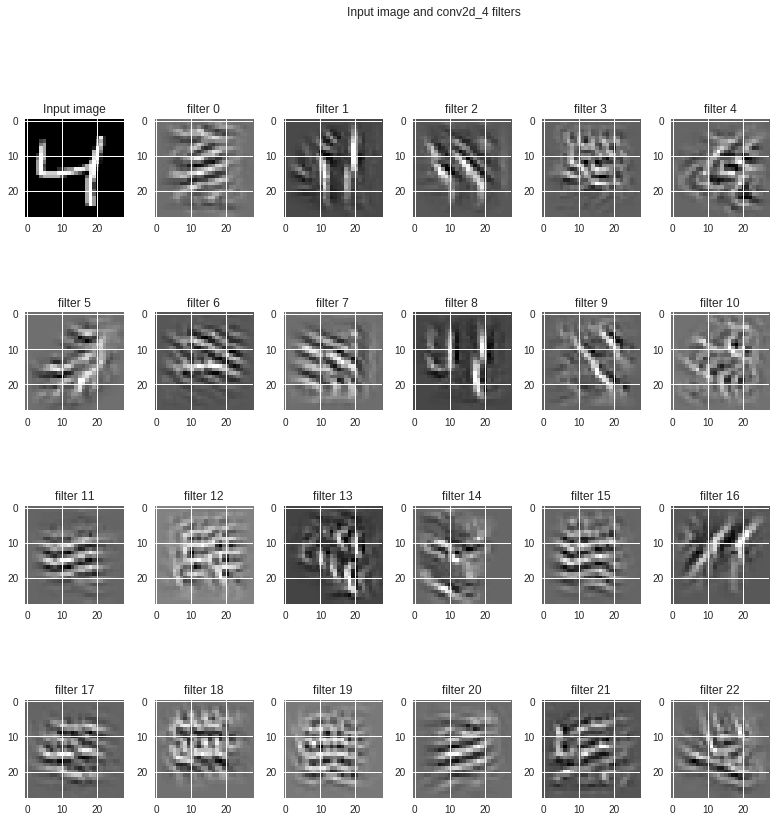

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()